In [2]:
## Import relevant libraries
import sys
import glob

sys.path.append('../../py_files/')
import quadrop as qd

qd.set_plotting_style()

### Data pre-procesing

In [3]:
# # Example usage
# base_dir = "../../../../Thomson Lab Dropbox/David Larios/activedrops/ubuntu/111624-C-E-G-RT/"
# qd.consolidate_images(base_dir)

In [4]:
# Example usage
data_path = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/021425-calibration-yfp/2p5ulTMB-1ulYFP_2/"

calibration_curve_paths = sorted(glob.glob("../../../../Thomson Lab Dropbox/David Larios/activedrops/calibration_curve/***ugml.tif"))


conditions_dict = {
    "1": "Pos0", 
    "2": "Pos1",
    "3": "Pos2",
    "4": "Pos3",
    "5": "Pos4",
    "6": "Pos5",
    "7": "Pos6",
    "8": "Pos7",
}

# Organize PosX folders into condition folders
qd.organize_conditions(data_path, conditions_dict)

# Now run the existing functions to reorganize the tiffs and rename the folders
conditions, subconditions = qd.prepare_conditions(data_path)
time_interval_list = [30] * len(conditions)  # time intervals in seconds between frames for each condition
subconditions = ['Rep1']
print("Conditions:", conditions)
print("Subconditions:", subconditions)



Conditions: ['1', '2', '3', '4', '5', '6', '7', '8']
Subconditions: ['Rep1']


In [ ]:
qd.reorgTiffsToOriginal(data_path, conditions, subconditions)


### Generate movies

In [ ]:
# Call the function
qd.fluorescence_heatmap(
    data_path, 
    conditions, 
    subconditions, 
    channel='cy5', 
    time_interval_list=time_interval_list, 
    vmax=15, 
    skip_frames=2, 
    calibration_curve_paths=calibration_curve_paths, 
    show_scalebar=False,
    )

In [ ]:
# Example usage
qd.create_movies(
    data_path, 
    conditions, 
    subconditions, 
    channel='cy5', 
    frame_rate=60,
    skip_frames=1
    )


In [ ]:
conditions = [
    'G_1p25nM',
    'G_2p5nM',
    'G_5nM',
    'G_10nM',
    'G_20nM',
    'G_40nM',
    'G_80nM',
    'G_160nM',
    'C_1p25nM',
    'C_2p5nM',
    'C_5nM',
    'C_10nM',
    'C_20nM',
    'C_40nM',
    'C_80nM',
    'C_160nM',
][::-1]


conditions

In [ ]:
qd.create_combined_heatmap_movie_custom_grid(
    data_path, 
    conditions, 
    subconditions, 
    channel='cy5', 
    grid_rows=4, 
    grid_cols=4, 
    frame_rate=60,
    batch_size=50
    )


In [ ]:
# Call the function
qd.fluorescence_heatmap(
    data_path, 
    conditions, 
    subconditions, 
    channel='GFP', 
    time_interval_list=time_interval_list, 
    vmax=500, 
    skip_frames=4, 
    calibration_curve_paths=calibration_curve_paths, 
    show_scalebar=True,
    )

In [ ]:
# Example usage
qd.create_movies(
    data_path, 
    conditions, 
    subconditions, 
    channel='GFP', 
    frame_rate=12,
    skip_frames=1
    )


In [ ]:
qd.create_combined_heatmap_movie_custom_grid(
    data_path, 
    conditions, 
    subconditions, 
    channel='GFP', 
    grid_rows=4, 
    grid_cols=2, 
    frame_rate=6,
    batch_size=50
    )


In [ ]:
qd.delete_temporary_image_directories(data_path, conditions, subconditions)

### Fluorescence Quantification

In [5]:
conditions = conditions[:-3]

In [ ]:
# Example usage
mw_kda_list = [27] * len(conditions)
droplet_volume_list = [2] * len(conditions)
protein_lengths_list = [238] * len(conditions)

qd.quantify_tiffiles(
    data_path, 
    conditions, 
    subconditions, 
    calibration_curve_paths, 
    mw_kda_list, 
    droplet_volume_list, 
    time_interval_list, 
    protein_lengths_list,
    ribosome_count=10**9,
    skip_frames=1,
    subtract_negative=False
)

### PIV pre-processing

In [ ]:
conditions

In [ ]:
qd.split_tiffs(data_path, conditions, subconditions, channel='cy5', file_interval=1)


### PIV

In [4]:
# Define feature limits and other parameters
v = 2E-7
velocity_limits = (0, v)
other_limits = (-0.0005, 0.0005)
skip_frames = 1 ### CHANGE THIS TO SKIP FRAMES


velocity_limits = (None, None)
other_limits = (None, None)


feature_limits = {
    # 'u [m/s]': (-v, v), 
    # 'v [m/s]': (-v, v), 
    # 'data type [-]': (None, None),
    'velocity magnitude [m/s]': velocity_limits,
    'vorticity [1/s]': other_limits,
    'divergence [1/s]': other_limits,
    # 'dcev [1]': (0, 250),
    'shear [1/s]': other_limits,
    'strain [1/s]': other_limits,
    'vector direction [degrees]': (-180, 180),
}


# Features for PCA and plotting
features_pca = [
    "vorticity [1/s]_mean",
    "velocity magnitude [um/s]",
    "distance [m]_mean",
    "divergence [1/s]_mean",
    "shear [1/s]_mean",
    "strain [1/s]_mean",
    "correlation length [um]", 
    "power [W]_mean",
    "work [J]",
]


In [5]:
conditions = [
    'C_1p25nM',
    'C_2p5nM',
    'C_5nM',
    'C_10nM',
    'C_20nM',
    'C_40nM',
    'C_80nM',
    'C_160nM',
    'G_1p25nM',
    'G_2p5nM',
    'G_5nM',
    'G_10nM',
    'G_20nM',
    'G_40nM',
    'G_80nM',
    'G_160nM',
    ]

In [ ]:
time_interval_list = [75] * len(conditions)  # time intervals in seconds between frames for each condition


# Process PIV data
qd.process_piv_data(
    data_path, 
    conditions,
    subconditions, 
    feature_limits, 
    time_interval_list, 
    min_frame=0, 
    max_frame=None, 
    skip_frames=1, 
    plot_autocorrelation=False, 
    frame_rate=1, 
    heatmaps=False
    )


In [ ]:
# Plot features and PCA
qd.plot_PIV_all(
    data_path, 
    conditions,
    subconditions, 
    features_pca, 
    min_frame=0, 
    max_frame=None
    )


### Expression + PIV

In [ ]:
# Combine the data and save it to the "output_data" directory
qd.combine_averaged_dataframes(data_path, conditions, subconditions)


In [ ]:
qd.merge_expression_piv_data(data_path)


In [ ]:
# x_column = "time (h)"  # Example x-axis column
# y_column = "Protein Concentration_nM"  # Example y-axis column


# x_column = "Protein Concentration_nM"  # Example y-axis column
# y_column = "velocity magnitude [m/s]_mean"  # Example y-axis column

# x_column = "time (h)"  # Example x-axis column
# y_column = "velocity magnitude [m/s]_mean"  # Example y-axis column

# x_column = "time (h)"  # Example x-axis column
# y_column = "power [W]_mean"  # Example y-axis column

# x_column = "time (h)"  # Example x-axis column
# y_column = "work [J]_mean"  # Example y-axis column

x_column = "time (h)"  # Example x-axis column
y_column = "distance [m]_mean"  # Example y-axis column


qd.plot_expression_piv(
    data_path,
    conditions,
    x_column, 
    y_column, 
    sigma_x=0.1, 
    sigma_y=10, 
    x_log=False, 
    y_log=True, 
    min_frame=0, 
    max_frame=None, 
    individual_plots=False
    )

In [ ]:

# List of features for PCA
features_pca = [
    "vorticity [1/s]_mean",
    "velocity magnitude [m/s]_mean",
    "distance [m]_mean",
    "divergence [1/s]_mean",
    "shear [1/s]_mean",
    "strain [1/s]_mean",
    "correlation length [m]_mean", 
    "power [W]_mean",
    "work [J]_mean",
    'vector direction [degrees]_mean',
    "Protein Concentration_nM", 
    'time (min)'
]

# Run PCA and save plot (with all conditions and subconditions in the same plot)
qd.plot_pca_expression_piv(data_path, conditions=conditions, subconditions=subconditions, features=features_pca, sigma=1)


In [ ]:

# Example usage
qd.delete_outputs(data_path, conditions, subconditions, output_dirs=None)


In [161]:
[285 / (2 ** i) for i in range(0,8)]

[285.0, 142.5, 71.25, 35.625, 17.8125, 8.90625, 4.453125, 2.2265625]

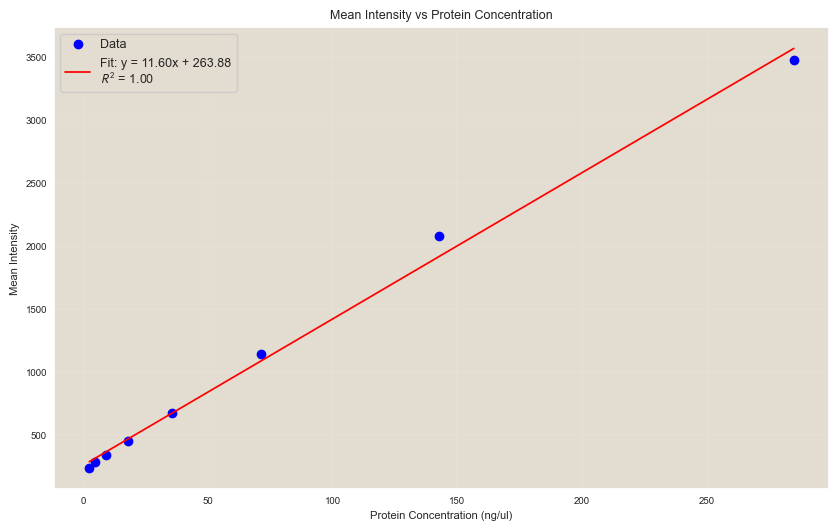

Slope: 11.60
Intercept: 263.88
R² = 1.00
ss_residual: 44466.01441456071
ss_total: 9200826.40863617
Predicted Values: [3570.94839905 1917.41175953 1090.64343978  677.2592799   470.56719996
  367.22115999  315.54814     289.71163001]


In [178]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.linear_model import LinearRegression

# Base path to the conditions
base_path = "../../../../Thomson Lab Dropbox/David Larios/activedrops/main/021425-calibration-yfp/2p5ulTMB-1ulYFP_"

# List of condition folders
conditions = ['1', '2', '3', '4', '5', '6', '7', '8']

# Initialize lists to store concentrations and mean intensities
concentrations = []
mean_intensities = []

# Known concentrations in ng/ul (serial 1:1 dilutions starting from 285 ng/ul)
known_concentrations = [285 / (2 ** i) for i in range(len(conditions))]

# Iterate over each condition
for condition, concentration in zip(conditions, known_concentrations):
    # Define the path to the images for the current condition
    image_path = f"{base_path}/{condition}/Rep1/original/*[Gg][Ff][Pp]*.tif"
    
    # Get a list of all image files and select the last one
    image_files = sorted(glob.glob(image_path))
    if image_files:
        last_image_file = image_files[-1]
        
        # Open the last image
        with Image.open(last_image_file) as img:
            # Convert image to numpy array
            img_array = np.array(img)
            # Calculate the mean intensity
            mean_intensity = img_array.mean()
            # Append the mean intensity and concentration to the lists
            mean_intensities.append(mean_intensity)
            concentrations.append(concentration)

# Convert lists to numpy arrays for linear regression
X = np.array(concentrations).reshape(-1, 1)
y = np.array(mean_intensities)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Manually calculate R²
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r_squared = 1 - (ss_residual / ss_total)

# Extract slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data and the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(concentrations, mean_intensities, color='blue', label='Data')
plt.plot(concentrations, y_pred, color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.2f}')
plt.xlabel('Protein Concentration (ng/ul)')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity vs Protein Concentration')
plt.legend()
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.show()

# Print the slope, intercept, and R²
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R² = {r_squared:.2f}")

print("ss_residual:", ss_residual)
print("ss_total:", ss_total)
print("Predicted Values:", y_pred)

In [195]:
import os
import glob
import numpy as np
import pandas as pd
from PIL import Image

# Initialize a list to store all data
all_data = []

# Define the interval between images in seconds
interval_seconds = 6

skip_frames = 50

# Loop through each condition directory
for condition in conditions:
    # Define the path to the images for the current condition
    image_path = f"../../../../Thomson Lab Dropbox/David Larios/activedrops/main/021425-calibration-yfp-24hAfter/2p5ulTMB-1ulYFP_/{condition}/Rep1/original/*[Gg][Ff][Pp]*.tif"
    image_path = f"../../../../Thomson Lab Dropbox/David Larios/activedrops/main/101324-k401-titration-rt/2p5TMB-1ulDNA_/K401_160nM-RT/Rep1/original/*[Gg][Ff][Pp]*.tif"
    # image_path = f"../../../../Thomson Lab Dropbox/David Larios/activedrops/main/100624-kif3-titration-RT/2p5ulTMB-1ulDNAXnM_/Kif3_160nM_1-RT/Rep1/original/*[Gg][Ff][Pp]*.tif"

    # Get a list of all image files
    image_files = sorted(glob.glob(image_path))[::skip_frames]
    
    # Initialize lists to store mean intensity values and protein concentrations for the current condition
    mean_intensities = []
    protein_concentrations = []
    
    # Loop through each image file
    for image_file in image_files:
        # Open the image
        with Image.open(image_file) as img:
            # Convert image to numpy array
            img_array = np.array(img)
            # Calculate the mean intensity
            mean_intensity = img_array.mean()
            # Append the mean intensity to the list
            mean_intensities.append(mean_intensity)
            # Calculate protein concentration using the provided slope and intercept
            protein_concentration = (mean_intensity - intercept) / slope
            # Append the protein concentration to the list
            protein_concentrations.append(protein_concentration)
    
    # Calculate time in seconds, minutes, and hours, including skip_frames
    time_seconds = [i * interval_seconds * skip_frames for i in range(len(image_files))]
    time_minutes = [t / 60 for t in time_seconds]
    time_hours = [t / 3600 for t in time_seconds]
    
    # Create a DataFrame for the current condition
    df = pd.DataFrame({
        'Condition': [condition] * len(image_files),
        'Image': [os.path.basename(f) for f in image_files],
        'Time (s)': time_seconds,
        'Time (min)': time_minutes,
        'Time (h)': time_hours,
        'Mean Intensity': mean_intensities,
        'Protein Concentration (ng/ul)': protein_concentrations
    })
    
    # Append the DataFrame to the list
    all_data.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(all_data, ignore_index=True)

final_df

,Condition,Image,Time (s),Time (min),Time (h),Mean Intensity,Protein Concentration (ng/ul)
0,1,img_000000000_4x_GFP.tif,0,0.0,0.000000,171.346102,-7.974051
1,1,img_000000050_4x_GFP.tif,300,5.0,0.083333,178.488749,-7.358505
2,1,img_000000100_4x_GFP.tif,600,10.0,0.166667,185.046045,-6.793404
3,1,img_000000150_4x_GFP.tif,900,15.0,0.250000,190.863133,-6.292094
4,1,img_000000200_4x_GFP.tif,1200,20.0,0.333333,196.396381,-5.815245
...,...,...,...,...,...,...,...
419,8,img_000002400_4x_GFP.tif,14400,240.0,4.000000,518.563756,21.948791
420,8,img_000002450_4x_GFP.tif,14700,245.0,4.083333,513.883967,21.545492
421,8,img_000002500_4x_GFP.tif,15000,250.0,4.166667,509.063352,21.130057
422,8,img_000002550_4x_GFP.tif,15300,255.0,4.250000,504.272579,20.717193


In [196]:
final_df['Condition'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8'], dtype=object)

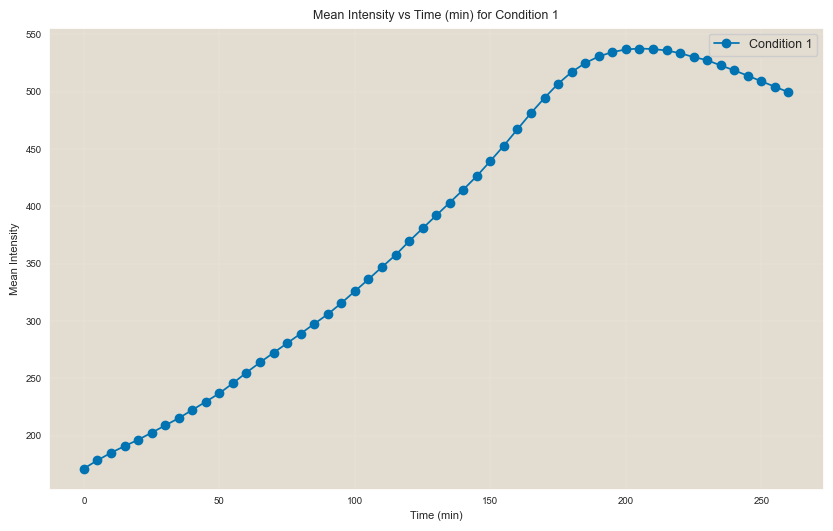

In [197]:
import matplotlib.pyplot as plt

# Filter the DataFrame for condition 1
condition_1_df = final_df[final_df['Condition'] == '5']

# Plot mean intensity vs time in minutes for condition 1
plt.figure(figsize=(10, 6))
plt.plot(condition_1_df['Time (min)'], condition_1_df['Mean Intensity'], marker='o', linestyle='-', label='Condition 1')
plt.xlabel('Time (min)')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity vs Time (min) for Condition 1')
plt.legend()
plt.grid(True)
plt.show()


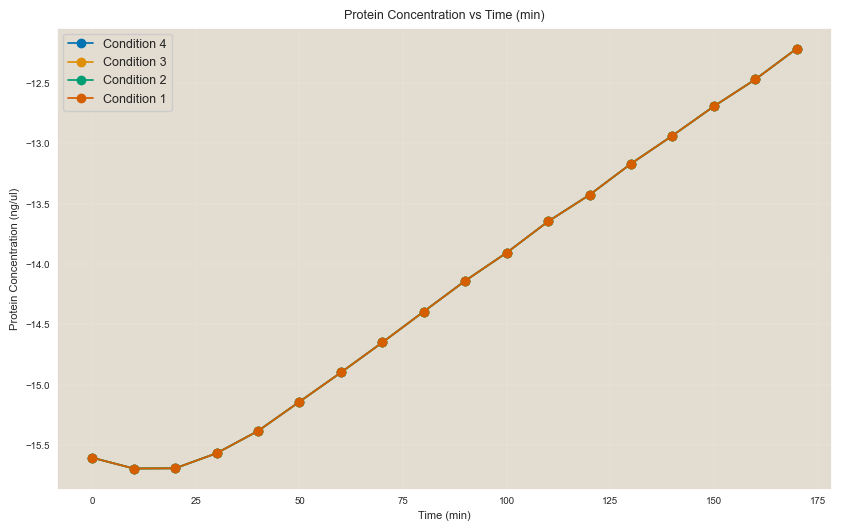

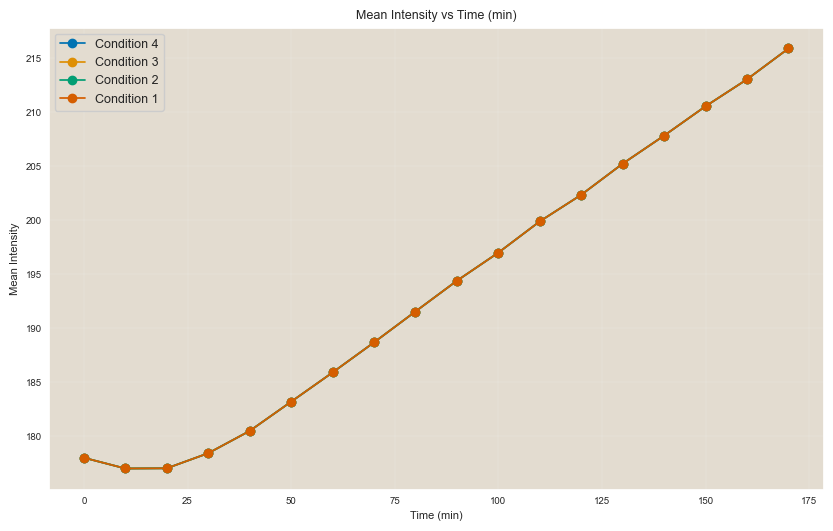

In [147]:
import matplotlib.pyplot as plt

# Plot protein concentration vs time in minutes for each condition
plt.figure(figsize=(10, 6))
for condition in final_df['Condition'].unique():
    condition_df = final_df[final_df['Condition'] == condition]
    plt.plot(condition_df['Time (min)'], condition_df['Protein Concentration (ng/ul)'], marker='o', linestyle='-', label=f'Condition {condition}')
plt.xlabel('Time (min)')
plt.ylabel('Protein Concentration (ng/ul)')
plt.title('Protein Concentration vs Time (min)')
plt.legend()
plt.grid(True)
plt.show()

# Plot mean intensity vs time in minutes for each condition
plt.figure(figsize=(10, 6))
for condition in final_df['Condition'].unique():
    condition_df = final_df[final_df['Condition'] == condition]
    plt.plot(condition_df['Time (min)'], condition_df['Mean Intensity'], marker='o', linestyle='-', label=f'Condition {condition}')
plt.xlabel('Time (min)')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity vs Time (min)')
plt.legend()
plt.grid(True)
plt.show()
